# Anscombe's Quartet Dataset

This dataset was constructed by Statistician <a href="https://en.wikipedia.org/wiki/Frank_Anscombe">Frank Anscombe </a>, in 1973. The Anscombe's Quartet Dataset comprises of four datasets shows have nearly identical simple descriptive statistics, yet they tell a different story when graphed. Each dataset consists of eleven (x,y) pairs. 

From reading his paper 'Graphs in Statistical Analysis', He wanted to show the importance of using graphs in statistics analysis as they were too often disregarded  “numerical calculations are exact, but graphs are rough.”. He believed that "since computers can do both, calculations and graphs, we should do both and study them to learn more."

In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as plt



# Load the example dataset for Anscombe's quartet
df = sns.load_dataset("anscombe")
df

,dataset,x,y
0,I,10.0,8.04
1,I,8.0,6.95
2,I,13.0,7.58
3,I,9.0,8.81
4,I,11.0,8.33
5,I,14.0,9.96
6,I,6.0,7.24
7,I,4.0,4.26
8,I,12.0,10.84
9,I,7.0,4.82


In [6]:
df.shape

(44, 3)

In [7]:
# when you group the datapoints by dataset you can see there are 11 data points in each
print(df.groupby('dataset').size())


dataset
I      11
II     11
III    11
IV     11
dtype: int64


# Plotting the Dataset
Plotting the dataset with Seaborne's linear model plot, lmplot. The line is drawn at best fit through the points given.  
Seaborn's lmplot combines regplot() and FacetGrid. 

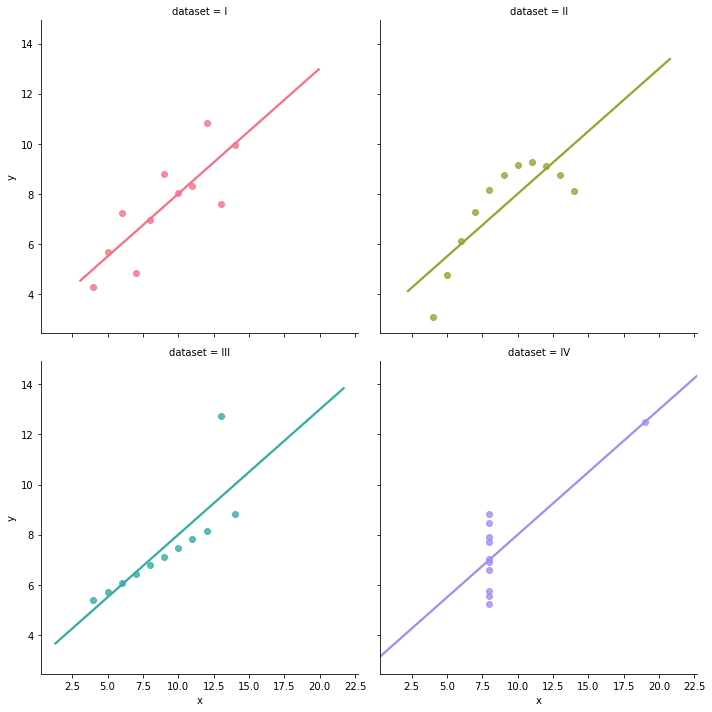

In [8]:
%matplotlib inline
# Show the results of a linear regression within each dataset
sns.lmplot(x="x", y="y", col="dataset", hue="dataset", data=df,
           col_wrap=2, ci=None, palette="husl")

# Descriptive Stastitics
What are descriptive statistics?

Descriptive statistics are used to describe the basic features of a dataset. They provide simple summaries about the sample of data. They form the basis of virtually every quantitative analysis of data.

In [9]:
summary = df.describe()
summary = summary.transpose()
summary.head()

,count,mean,std,min,25%,50%,75%,max
x,44.0,9.000000,3.198837,4.0,7.0000,8.00,11.0000,19.00
y,44.0,7.500682,1.958925,3.1,6.1175,7.52,8.7475,12.74


### Grouping the data points by their datasets 
This gives us a better breakdown of statistics and we can easily compare the datasets in this table below:

In [10]:
data = df.groupby('dataset')
data.describe()

x                                               y            \
        count mean       std  min  25%  50%   75%   max count      mean   
dataset                                                                   
I        11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500909   
II       11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500909   
III      11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500000   
IV       11.0  9.0  3.316625  8.0  8.0  8.0   8.0  19.0  11.0  7.500909   

                                                   
              std   min    25%   50%   75%    max  
dataset                                            
I        2.031568  4.26  6.315  7.58  8.57  10.84  
II       2.031657  3.10  6.695  8.14  8.95   9.26  
III      2.030424  5.39  6.250  7.11  7.98  12.74  
IV       2.030579  5.25  6.170  7.04  8.19  12.50

### Correlation between x and y
Correlation measures how strong the relationship between two variables. It’s important to realize that correlation doesn’t necessarily imply that one of the variables affects the other.

In [11]:
data = df.groupby('dataset').corr()
data

x         y
dataset                      
I       x  1.000000  0.816421
        y  0.816421  1.000000
II      x  1.000000  0.816237
        y  0.816237  1.000000
III     x  1.000000  0.816287
        y  0.816287  1.000000
IV      x  1.000000  0.816521
        y  0.816521  1.000000

In [23]:
df['x']

0     10.0
1      8.0
2     13.0
3      9.0
4     11.0
5     14.0
6      6.0
7      4.0
8     12.0
9      7.0
10     5.0
11    10.0
12     8.0
13    13.0
14     9.0
15    11.0
16    14.0
17     6.0
18     4.0
19    12.0
20     7.0
21     5.0
22    10.0
23     8.0
24    13.0
25     9.0
26    11.0
27    14.0
28     6.0
29     4.0
30    12.0
31     7.0
32     5.0
33     8.0
34     8.0
35     8.0
36     8.0
37     8.0
38     8.0
39     8.0
40    19.0
41     8.0
42     8.0
43     8.0
Name: x, dtype: float64

### Linear regression line

In [27]:
np.polyfit(df['x'],df['y'], 1)

array([0.49993182, 3.00129545])

In [28]:
#### Iterate through x,y pairs
for x, y in zip(anscombe_x, anscombe_y):
    # Compute the slope and intercept: a, b
    a, b = np.polyfit(x, y, 1)

NameError: name 'anscombe_x' is not defined

### Coefficient of determination of the linear regression

# Why is Anscombe's Quartet Dataset interesting?
From running data.describe() we can see that the datasets have similar:

- The average x value is 9 for each dataset
- The average y value is 7.50 for each dataset
- The correlation between x and y is 0.816 for each dataset


    
From studying the data, one might believe that the dataset are similiar but after plotting the data points on a graph you can they are very different. 

In [ ]:
Disc

- Th Variance 

# References

https://en.wikipedia.org/wiki/Anscombe's_quartet

https://heapanalytics.com/blog/data-stories/anscombes-quartet-and-why-summary-statistics-dont-tell-the-whole-story

https://www.socialresearchmethods.net/kb/statdesc.htm

https://dabblingwithdata.wordpress.com/2017/05/03/the-datasaurus-a-monstrous-anscombe-for-the-21st-century/

http://www.sjsu.edu/faculty/gerstman/StatPrimer/anscombe1973.pdf

Another paper: Same Stats, DifferentGraphs

https://seaborn.pydata.org/tutorial/regression.html

https://rstudio-pubs-static.s3.amazonaws.com/52381_36ec82827e4b476fb968d9143aec7c4f.html

https://vknight.org/unpeudemath/mathematics/2016/10/29/anscombes-quartet-variability-and-ciw.html

https://stats.seandolinar.com/introduction-to-correlation-with-r-anscombes-quartet/